In [1]:
import numpy as np
import pandas as pd

In [2]:
train_df = pd.read_csv('datas/train.csv')
test_df = pd.read_csv('datas/test.csv')

In [3]:
train_df.loc[train_df['Transported']==True, 'Transported'] = 1
train_df.loc[train_df['Transported']==False, 'Transported'] = 0
train_df['Transported'] = train_df['Transported'].astype(int)

In [4]:
train_df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,0
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,1
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,0
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,0
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,0
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,0
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,1
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,0


In [5]:
df = pd.concat((train_df.drop('Transported', axis=1), test_df), axis=0, ignore_index=True)
df.isnull().sum()

PassengerId       0
HomePlanet      288
CryoSleep       310
Cabin           299
Destination     274
Age             270
VIP             296
RoomService     263
FoodCourt       289
ShoppingMall    306
Spa             284
VRDeck          268
Name            294
dtype: int64

In [6]:
df['PassengerId_group'] = df.PassengerId.str.split('_').str[0]
df['PassengerId_group'] = df['PassengerId_group'].astype(int)
df['PassengerId_num'] = df.PassengerId.str.split('_').str[1]
df['PassengerId_num'] = df['PassengerId_num'].astype(int)

In [7]:
show = pd.concat((df[:train_df.shape[0]], train_df[['Transported']]), axis=1)
show.corr().style.background_gradient(cmap='coolwarm').format(precision=2)
# df.drop(['Name', 'PassengerId'], axis=1)

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,PassengerId_group,PassengerId_num,Transported
Age,1.00,0.07,0.13,0.03,0.12,0.10,-0.01,-0.13,-0.08
RoomService,0.07,1.00,-0.02,0.05,0.01,-0.02,-0.00,-0.02,-0.24
FoodCourt,0.13,-0.02,1.00,-0.01,0.22,0.23,-0.01,0.02,0.05
ShoppingMall,0.03,0.05,-0.01,1.00,0.01,-0.01,0.02,-0.04,0.01
Spa,0.12,0.01,0.22,0.01,1.00,0.15,-0.01,0.02,-0.22
VRDeck,0.10,-0.02,0.23,-0.01,0.15,1.00,0.02,0.01,-0.21
PassengerId_group,-0.01,-0.00,-0.01,0.02,-0.01,0.02,1.00,0.01,0.02
PassengerId_num,-0.13,-0.02,0.02,-0.04,0.02,0.01,0.01,1.00,0.07
Transported,-0.08,-0.24,0.05,0.01,-0.22,-0.21,0.02,0.07,1.00


In [8]:
df['HomePlanet'] = df['HomePlanet'].fillna(0)
df['HomePlanet'] = df['HomePlanet'].map({"Earth": 1, 'Europa':2, "Mars":3, 0:0})

In [9]:
df['Age'].fillna(df['Age'].median(), inplace=True)

In [10]:
df['VIP'].fillna(0, inplace=True)
df.loc[df['VIP']==True, 'VIP'] = 1
df.loc[df['VIP']==False, 'VIP'] = 0
df['VIP'] = df['VIP'].astype(int)

<AxesSubplot:xlabel='VIP'>

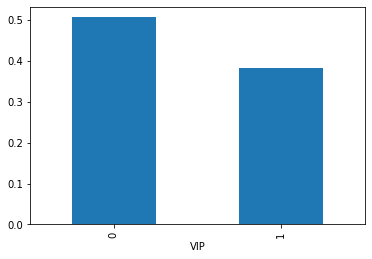

In [11]:
show = pd.concat((df[:train_df.shape[0]], train_df[['Transported']]), axis=1)
show.groupby('VIP')['Transported'].mean().plot.bar()

<AxesSubplot:xlabel='Destination'>

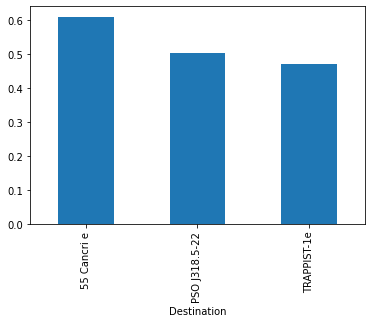

In [12]:
show.groupby('Destination')['Transported'].mean().plot.bar()

In [13]:
df = pd.get_dummies(df, columns = ['Destination'])

In [14]:
show = pd.concat((df[:train_df.shape[0]], train_df[['Transported']]), axis=1)
show.corr().style.background_gradient(cmap='coolwarm').format(precision=2)

,HomePlanet,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,PassengerId_group,PassengerId_num,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,Transported
HomePlanet,1.00,0.13,0.12,0.21,0.07,0.10,0.06,0.04,-0.01,0.04,0.04,-0.19,0.08,0.11
Age,0.13,1.00,0.09,0.07,0.13,0.03,0.12,0.10,-0.01,-0.13,0.02,-0.03,-0.00,-0.07
VIP,0.12,0.09,1.00,0.06,0.13,0.02,0.06,0.12,0.01,0.00,0.05,-0.00,-0.04,-0.04
RoomService,0.21,0.07,0.06,1.00,-0.02,0.05,0.01,-0.02,-0.00,-0.02,-0.02,-0.06,0.06,-0.24
FoodCourt,0.07,0.13,0.13,-0.02,1.00,-0.01,0.22,0.23,-0.01,0.02,0.14,-0.07,-0.07,0.05
ShoppingMall,0.10,0.03,0.02,0.05,-0.01,1.00,0.01,-0.01,0.02,-0.04,-0.01,-0.03,0.03,0.01
Spa,0.06,0.12,0.06,0.01,0.22,0.01,1.00,0.15,-0.01,0.02,0.08,-0.05,-0.03,-0.22
VRDeck,0.04,0.10,0.12,-0.02,0.23,-0.01,0.15,1.00,0.02,0.01,0.09,-0.05,-0.05,-0.21
PassengerId_group,-0.01,-0.01,0.01,-0.00,-0.01,0.02,-0.01,0.02,1.00,0.01,-0.00,0.01,-0.01,0.02
PassengerId_num,0.04,-0.13,0.00,-0.02,0.02,-0.04,0.02,0.01,0.01,1.00,0.05,-0.05,-0.01,0.07


In [15]:
df = df.drop(['PassengerId', 'Name'], axis=1)

In [16]:
df['Cabin_Deck'] = df.Cabin.str.split("/").str[0]
df['Cabin_num'] = df.Cabin.str.split("/").str[1]
df['Cabin_side'] = df.Cabin.str.split("/").str[2]

<AxesSubplot:xlabel='Cabin_Deck'>

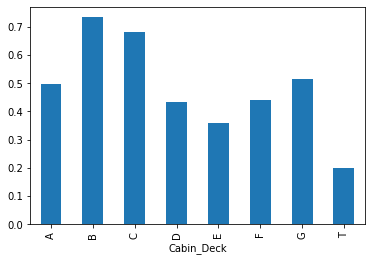

In [17]:
show = pd.concat((df[:train_df.shape[0]], train_df[['Transported']]), axis=1)
show.groupby('Cabin_Deck')['Transported'].mean().plot.bar()

In [18]:
df['FoodCourt'].fillna(0, inplace=True)
df['RoomService'].fillna(0, inplace=True)
df['ShoppingMall'].fillna(0, inplace=True)
df['Spa'].fillna(0, inplace=True)
df['VRDeck'].fillna(0, inplace=True)
df['Total_Bills'] = df['FoodCourt'] + df['RoomService'] + df['ShoppingMall'] + df['Spa'] + df['VRDeck']

In [19]:
show = pd.concat((df[:train_df.shape[0]], train_df[['Transported']]), axis=1)
show.corr().style.background_gradient(cmap='coolwarm').format(precision=2)

,HomePlanet,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,PassengerId_group,PassengerId_num,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,Total_Bills,Transported
HomePlanet,1.00,0.13,0.12,0.20,0.07,0.10,0.05,0.04,-0.01,0.04,0.04,-0.19,0.08,0.15,0.11
Age,0.13,1.00,0.09,0.07,0.13,0.03,0.12,0.10,-0.01,-0.13,0.02,-0.03,-0.00,0.18,-0.07
VIP,0.12,0.09,1.00,0.06,0.13,0.02,0.06,0.12,0.01,0.00,0.05,-0.00,-0.04,0.16,-0.04
RoomService,0.20,0.07,0.06,1.00,-0.02,0.05,0.01,-0.02,0.00,-0.02,-0.02,-0.06,0.06,0.23,-0.24
FoodCourt,0.07,0.13,0.13,-0.02,1.00,-0.01,0.22,0.22,-0.01,0.02,0.13,-0.07,-0.07,0.74,0.05
ShoppingMall,0.10,0.03,0.02,0.05,-0.01,1.00,0.01,-0.01,0.02,-0.04,-0.01,-0.03,0.03,0.22,0.01
Spa,0.05,0.12,0.06,0.01,0.22,0.01,1.00,0.15,-0.01,0.02,0.08,-0.05,-0.03,0.59,-0.22
VRDeck,0.04,0.10,0.12,-0.02,0.22,-0.01,0.15,1.00,0.02,0.01,0.09,-0.04,-0.05,0.59,-0.20
PassengerId_group,-0.01,-0.01,0.01,0.00,-0.01,0.02,-0.01,0.02,1.00,0.01,-0.00,0.01,-0.01,0.00,0.02
PassengerId_num,0.04,-0.13,0.00,-0.02,0.02,-0.04,0.02,0.01,0.01,1.00,0.05,-0.05,-0.01,0.01,0.07


In [20]:
df = pd.get_dummies(df, columns = ['Cabin_Deck'])

In [21]:
df = pd.get_dummies(df, columns = ['Cabin_side'])

In [22]:
show = pd.concat((df[:train_df.shape[0]], train_df[['Transported']]), axis=1)
show.corr().style.background_gradient(cmap='coolwarm').format(precision=2)

,HomePlanet,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,PassengerId_group,PassengerId_num,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,Total_Bills,Cabin_Deck_A,Cabin_Deck_B,Cabin_Deck_C,Cabin_Deck_D,Cabin_Deck_E,Cabin_Deck_F,Cabin_Deck_G,Cabin_Deck_T,Cabin_side_P,Cabin_side_S,Transported
HomePlanet,1.00,0.13,0.12,0.20,0.07,0.10,0.05,0.04,-0.01,0.04,0.04,-0.19,0.08,0.15,0.07,0.13,0.13,0.27,0.10,0.12,-0.51,-0.00,0.00,-0.00,0.11
Age,0.13,1.00,0.09,0.07,0.13,0.03,0.12,0.10,-0.01,-0.13,0.02,-0.03,-0.00,0.18,0.07,0.10,0.13,0.08,0.03,-0.02,-0.21,0.01,-0.01,0.01,-0.07
VIP,0.12,0.09,1.00,0.06,0.13,0.02,0.06,0.12,0.01,0.00,0.05,-0.00,-0.04,0.16,0.13,0.07,0.07,0.07,-0.01,-0.06,-0.10,-0.00,0.01,-0.01,-0.04
RoomService,0.20,0.07,0.06,1.00,-0.02,0.05,0.01,-0.02,0.00,-0.02,-0.02,-0.06,0.06,0.23,-0.02,-0.06,-0.02,0.16,0.04,0.09,-0.15,0.01,0.01,-0.01,-0.24
FoodCourt,0.07,0.13,0.13,-0.02,1.00,-0.01,0.22,0.22,-0.01,0.02,0.13,-0.07,-0.07,0.74,0.12,0.16,0.26,0.02,-0.04,-0.13,-0.15,0.01,-0.02,0.02,0.05
ShoppingMall,0.10,0.03,0.02,0.05,-0.01,1.00,0.01,-0.01,0.02,-0.04,-0.01,-0.03,0.03,0.22,-0.02,-0.01,0.00,0.05,0.03,0.07,-0.11,-0.01,0.02,-0.02,0.01
Spa,0.05,0.12,0.06,0.01,0.22,0.01,1.00,0.15,-0.01,0.02,0.08,-0.05,-0.03,0.59,0.06,0.11,0.16,0.03,-0.01,-0.09,-0.12,0.04,-0.01,-0.00,-0.22
VRDeck,0.04,0.10,0.12,-0.02,0.22,-0.01,0.15,1.00,0.02,0.01,0.09,-0.04,-0.05,0.59,0.10,0.12,0.21,-0.00,-0.02,-0.09,-0.13,0.01,0.01,-0.01,-0.20
PassengerId_group,-0.01,-0.01,0.01,0.00,-0.01,0.02,-0.01,0.02,1.00,0.01,-0.00,0.01,-0.01,0.00,0.01,-0.01,0.01,-0.01,-0.00,0.01,0.00,-0.02,0.01,-0.00,0.02
PassengerId_num,0.04,-0.13,0.00,-0.02,0.02,-0.04,0.02,0.01,0.01,1.00,0.05,-0.05,-0.01,0.01,0.03,0.06,0.08,0.00,-0.04,-0.11,0.04,-0.01,-0.01,0.01,0.07


In [23]:
df = df.drop(['Cabin', 'Cabin_num'], axis=1)

<AxesSubplot:xlabel='CryoSleep'>

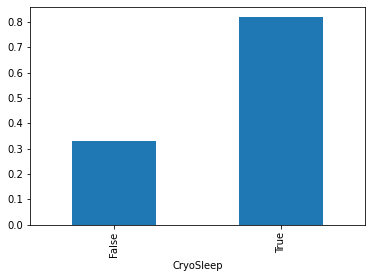

In [24]:
show.groupby('CryoSleep')['Transported'].mean().plot.bar()

In [25]:
df.CryoSleep = df.CryoSleep.replace({True: 1, False: 0})

In [26]:
show = pd.concat((df[:train_df.shape[0]], train_df[['Transported']]), axis=1)
show.corr().style.background_gradient(cmap='coolwarm').format(precision=2)

,HomePlanet,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,PassengerId_group,PassengerId_num,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,Total_Bills,Cabin_Deck_A,Cabin_Deck_B,Cabin_Deck_C,Cabin_Deck_D,Cabin_Deck_E,Cabin_Deck_F,Cabin_Deck_G,Cabin_Deck_T,Cabin_side_P,Cabin_side_S,Transported
HomePlanet,1.00,0.08,0.13,0.12,0.20,0.07,0.10,0.05,0.04,-0.01,0.04,0.04,-0.19,0.08,0.15,0.07,0.13,0.13,0.27,0.10,0.12,-0.51,-0.00,0.00,-0.00,0.11
CryoSleep,0.08,1.00,-0.07,-0.08,-0.25,-0.21,-0.21,-0.20,-0.20,-0.01,0.06,0.07,0.09,-0.10,-0.38,-0.03,0.13,0.03,-0.07,-0.11,-0.22,0.25,-0.02,-0.02,0.02,0.47
Age,0.13,-0.07,1.00,0.09,0.07,0.13,0.03,0.12,0.10,-0.01,-0.13,0.02,-0.03,-0.00,0.18,0.07,0.10,0.13,0.08,0.03,-0.02,-0.21,0.01,-0.01,0.01,-0.07
VIP,0.12,-0.08,0.09,1.00,0.06,0.13,0.02,0.06,0.12,0.01,0.00,0.05,-0.00,-0.04,0.16,0.13,0.07,0.07,0.07,-0.01,-0.06,-0.10,-0.00,0.01,-0.01,-0.04
RoomService,0.20,-0.25,0.07,0.06,1.00,-0.02,0.05,0.01,-0.02,0.00,-0.02,-0.02,-0.06,0.06,0.23,-0.02,-0.06,-0.02,0.16,0.04,0.09,-0.15,0.01,0.01,-0.01,-0.24
FoodCourt,0.07,-0.21,0.13,0.13,-0.02,1.00,-0.01,0.22,0.22,-0.01,0.02,0.13,-0.07,-0.07,0.74,0.12,0.16,0.26,0.02,-0.04,-0.13,-0.15,0.01,-0.02,0.02,0.05
ShoppingMall,0.10,-0.21,0.03,0.02,0.05,-0.01,1.00,0.01,-0.01,0.02,-0.04,-0.01,-0.03,0.03,0.22,-0.02,-0.01,0.00,0.05,0.03,0.07,-0.11,-0.01,0.02,-0.02,0.01
Spa,0.05,-0.20,0.12,0.06,0.01,0.22,0.01,1.00,0.15,-0.01,0.02,0.08,-0.05,-0.03,0.59,0.06,0.11,0.16,0.03,-0.01,-0.09,-0.12,0.04,-0.01,-0.00,-0.22
VRDeck,0.04,-0.20,0.10,0.12,-0.02,0.22,-0.01,0.15,1.00,0.02,0.01,0.09,-0.04,-0.05,0.59,0.10,0.12,0.21,-0.00,-0.02,-0.09,-0.13,0.01,0.01,-0.01,-0.20
PassengerId_group,-0.01,-0.01,-0.01,0.01,0.00,-0.01,0.02,-0.01,0.02,1.00,0.01,-0.00,0.01,-0.01,0.00,0.01,-0.01,0.01,-0.01,-0.00,0.01,0.00,-0.02,0.01,-0.00,0.02


In [27]:
from sklearn.model_selection import train_test_split
df_wo_CryoSleep = df[df['CryoSleep'].isnull()]
df_with_CryoSleep = df[~df['CryoSleep'].isnull()]

In [28]:
cs_X_train, cs_X_test, cs_y_train, cs_y_test = train_test_split(df_with_CryoSleep.drop(["CryoSleep"], axis=1), df_with_CryoSleep['CryoSleep'], test_size=0.2, stratify=df_with_CryoSleep['CryoSleep'])

In [29]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(cs_X_train, cs_y_train)

RandomForestClassifier()

In [30]:
rfc_train_pred = rfc.predict(cs_X_train)
rfc_test_pred = rfc.predict(cs_X_test)

In [31]:
from sklearn.metrics import accuracy_score
accuracy_score(rfc_train_pred, cs_y_train), accuracy_score(rfc_test_pred, cs_y_test)

(1.0, 0.9439178515007899)

In [32]:
CryoSleep_pred = rfc.predict(df_wo_CryoSleep.drop("CryoSleep", axis=1))

In [33]:
df.loc[df['CryoSleep'].isnull(), "CryoSleep"] = CryoSleep_pred

In [34]:
show = pd.concat((df[:train_df.shape[0]], train_df[['Transported']]), axis=1)
show.corr().style.background_gradient(cmap='coolwarm').format(precision=2)

,HomePlanet,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,PassengerId_group,PassengerId_num,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,Total_Bills,Cabin_Deck_A,Cabin_Deck_B,Cabin_Deck_C,Cabin_Deck_D,Cabin_Deck_E,Cabin_Deck_F,Cabin_Deck_G,Cabin_Deck_T,Cabin_side_P,Cabin_side_S,Transported
HomePlanet,1.00,0.08,0.13,0.12,0.20,0.07,0.10,0.05,0.04,-0.01,0.04,0.04,-0.19,0.08,0.15,0.07,0.13,0.13,0.27,0.10,0.12,-0.51,-0.00,0.00,-0.00,0.11
CryoSleep,0.08,1.00,-0.07,-0.08,-0.25,-0.21,-0.21,-0.20,-0.20,-0.01,0.07,0.07,0.09,-0.10,-0.39,-0.03,0.12,0.03,-0.07,-0.11,-0.22,0.25,-0.02,-0.02,0.01,0.47
Age,0.13,-0.07,1.00,0.09,0.07,0.13,0.03,0.12,0.10,-0.01,-0.13,0.02,-0.03,-0.00,0.18,0.07,0.10,0.13,0.08,0.03,-0.02,-0.21,0.01,-0.01,0.01,-0.07
VIP,0.12,-0.08,0.09,1.00,0.06,0.13,0.02,0.06,0.12,0.01,0.00,0.05,-0.00,-0.04,0.16,0.13,0.07,0.07,0.07,-0.01,-0.06,-0.10,-0.00,0.01,-0.01,-0.04
RoomService,0.20,-0.25,0.07,0.06,1.00,-0.02,0.05,0.01,-0.02,0.00,-0.02,-0.02,-0.06,0.06,0.23,-0.02,-0.06,-0.02,0.16,0.04,0.09,-0.15,0.01,0.01,-0.01,-0.24
FoodCourt,0.07,-0.21,0.13,0.13,-0.02,1.00,-0.01,0.22,0.22,-0.01,0.02,0.13,-0.07,-0.07,0.74,0.12,0.16,0.26,0.02,-0.04,-0.13,-0.15,0.01,-0.02,0.02,0.05
ShoppingMall,0.10,-0.21,0.03,0.02,0.05,-0.01,1.00,0.01,-0.01,0.02,-0.04,-0.01,-0.03,0.03,0.22,-0.02,-0.01,0.00,0.05,0.03,0.07,-0.11,-0.01,0.02,-0.02,0.01
Spa,0.05,-0.20,0.12,0.06,0.01,0.22,0.01,1.00,0.15,-0.01,0.02,0.08,-0.05,-0.03,0.59,0.06,0.11,0.16,0.03,-0.01,-0.09,-0.12,0.04,-0.01,-0.00,-0.22
VRDeck,0.04,-0.20,0.10,0.12,-0.02,0.22,-0.01,0.15,1.00,0.02,0.01,0.09,-0.04,-0.05,0.59,0.10,0.12,0.21,-0.00,-0.02,-0.09,-0.13,0.01,0.01,-0.01,-0.20
PassengerId_group,-0.01,-0.01,-0.01,0.01,0.00,-0.01,0.02,-0.01,0.02,1.00,0.01,-0.00,0.01,-0.01,0.00,0.01,-0.01,0.01,-0.01,-0.00,0.01,0.00,-0.02,0.01,-0.00,0.02


In [35]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

In [36]:
cv = StratifiedKFold(n_splits=3, shuffle=True)
model = GradientBoostingClassifier()
param_grid = {
    'n_estimators': [200],
    'learning_rate': [0.1, 0.05],
    'max_depth': [3, 5, 7],
    'subsample': [0.8],
    'random_state': [1234],
    'min_samples_split': [2, 4],
}
gsv = GridSearchCV(model, cv=cv, param_grid=param_grid, refit=True, verbose=3)

In [37]:
train_data = df[:train_df.shape[0]]
test_data = df[train_df.shape[0]:]
target = train_df['Transported']

In [38]:
gsv.fit(train_data, target)

Fitting 3 folds for each of 12 candidates, totalling 36 fits
[CV 1/3] END learning_rate=0.1, max_depth=3, min_samples_split=2, n_estimators=200, random_state=1234, subsample=0.8;, score=0.806 total time=   1.5s
[CV 2/3] END learning_rate=0.1, max_depth=3, min_samples_split=2, n_estimators=200, random_state=1234, subsample=0.8;, score=0.810 total time=   1.4s
[CV 3/3] END learning_rate=0.1, max_depth=3, min_samples_split=2, n_estimators=200, random_state=1234, subsample=0.8;, score=0.804 total time=   1.4s
[CV 1/3] END learning_rate=0.1, max_depth=3, min_samples_split=4, n_estimators=200, random_state=1234, subsample=0.8;, score=0.803 total time=   1.4s
[CV 2/3] END learning_rate=0.1, max_depth=3, min_samples_split=4, n_estimators=200, random_state=1234, subsample=0.8;, score=0.810 total time=   1.4s
[CV 3/3] END learning_rate=0.1, max_depth=3, min_samples_split=4, n_estimators=200, random_state=1234, subsample=0.8;, score=0.807 total time=   1.4s
[CV 1/3] END learning_rate=0.1, max_dep

GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=True),
             estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.1, 0.05], 'max_depth': [3, 5, 7],
                         'min_samples_split': [2, 4], 'n_estimators': [200],
                         'random_state': [1234], 'subsample': [0.8]},
             verbose=3)

In [39]:
train_pred = gsv.best_estimator_.predict(train_data)
accuracy_score(train_pred, target)

0.9103876682388128

In [40]:
test_pred = gsv.best_estimator_.predict(test_data)

In [41]:
pd.DataFrame({
    'PassengerId': test_df['PassengerId'],
    'Transported': test_pred.astype(bool),
}).to_csv("outputs/submit.csv")